In [1]:
from gpt import GPT

import numpy as np

In [2]:
def test_dcgun_template(test_dataset1='gpt356_apple_silicon', 
                        test_dataset2=None,
                        check_particles=True,
                        check_stats=True
                       ):

    # Load test archive
    G1 = GPT()
    G1.load_archive(f'../examples/templates/dcgun/test.{test_dataset1}.h5')

    if test_dataset2 is None:
        
        # Rerun test sim
        G2 = GPT('../examples/templates/dcgun/gpt.in')
        G2.set_variables({'gun_voltage':375,'sol_1_current':-3, 'Ntout':100})
        G2.run()

    else:

        G2 = GPT()
        G2.load_archive(f'../examples/templates/dcgun/test.{test_dataset2}.h5')

    assert G2.n_screen == G1.n_screen, 'Inconsistent number of screens'
    assert G2.n_tout == G1.n_tout, 'Inconsistent number of touts'

    keys = ['x', 'y', 'z', 'px', 'pz', 'py', 't', 'id']
    stats = ['mean', 'sigma']
    
    if check_particles:
        
        for ii, scr in enumerate(G2.screen):
    
            for key in keys:
                assert np.all(np.isclose(scr[key], G1.screen[ii][key]))
    
        for ii, tout in enumerate(G2.tout):
    
            for key in keys:
                assert np.all(np.isclose(tout[key], G1.tout[ii][key]))

    if check_stats:

        for stat in stats:
            for ii, scr in enumerate(G2.screen):

                if stat == 'sigma':
                    atol = G1.screen[ii][f'{stat}_{key}'] * 1e-2
        
                for key in keys:
                    assert np.all(np.isclose(scr[f'{stat}_{key}'], G1.screen[ii][f'{stat}_{key}'])), f'{stat}_{key}'
        
            for ii, tout in enumerate(G2.tout):
        
                for key in keys:
                    assert np.all(np.isclose(tout[f'{stat}_{key}'], G1.tout[ii][f'{stat}_{key}'])), f'{stat}_{key}'

        
    

In [3]:
test_dcgun_template()

# Comparison of GPT v3.5.6 to GPT v3.5.3
---

In [4]:
#test_dcgun_template(test_dataset1='gpt356_apple_silicon', 
#                    test_dataset2='gpt353_apple_silicon', 
#                    check_particles=False)

In [5]:
from matplotlib import pyplot as plt

In [6]:
G1 = GPT()
G1.load_archive('../examples/templates/dcgun/test.gpt353_apple_silicon.h5')

In [7]:
G2 = GPT('../examples/templates/dcgun/gpt.in')
G2.set_variables({'gun_voltage':375,'sol_1_current':-3, 'Ntout':100})
G2.run()

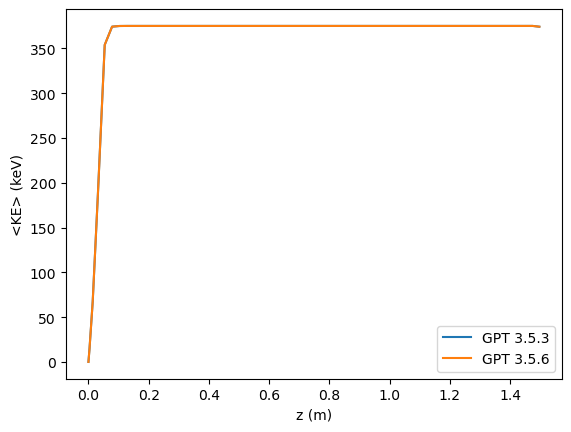

In [8]:
plt.plot(G1.tout_stat('mean_z'), G1.tout_stat('mean_kinetic_energy')/1000, label='GPT 3.5.3')
plt.plot(G2.tout_stat('mean_z'), G2.tout_stat('mean_kinetic_energy')/1000, label='GPT 3.5.6')
plt.xlabel('z (m)')
plt.ylabel(r'<KE> (keV)')
plt.legend()

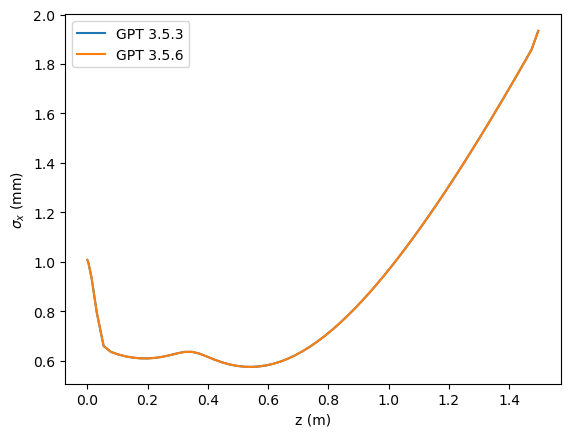

In [9]:
plt.plot(G1.tout_stat('mean_z'), G1.tout_stat('sigma_x')*1000, label='GPT 3.5.3')
plt.plot(G2.tout_stat('mean_z'), G2.tout_stat('sigma_x')*1000, label='GPT 3.5.6')
plt.xlabel('z (m)')
plt.ylabel(r'$\sigma_x$ (mm)')
plt.legend()

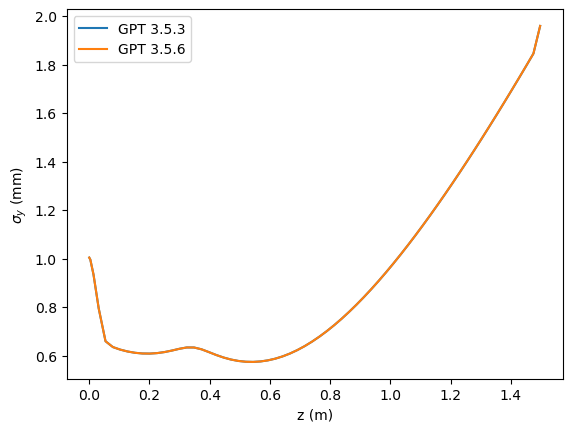

In [10]:
plt.plot(G1.tout_stat('mean_z'), G1.tout_stat('sigma_y')*1000, label='GPT 3.5.3')
plt.plot(G2.tout_stat('mean_z'), G2.tout_stat('sigma_y')*1000, label='GPT 3.5.6')
plt.xlabel('z (m)')
plt.ylabel(r'$\sigma_y$ (mm)')
plt.legend()

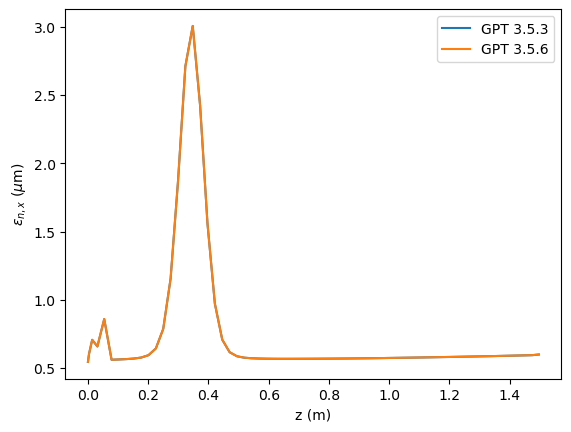

In [11]:
plt.plot(G1.tout_stat('mean_z'), G1.tout_stat('norm_emit_x')*1e6, label='GPT 3.5.3')
plt.plot(G2.tout_stat('mean_z'), G2.tout_stat('norm_emit_x')*1e6, label='GPT 3.5.6')
plt.xlabel('z (m)')
plt.ylabel(r'$\epsilon_{n,x}$ ($\mu$m)')
plt.legend()

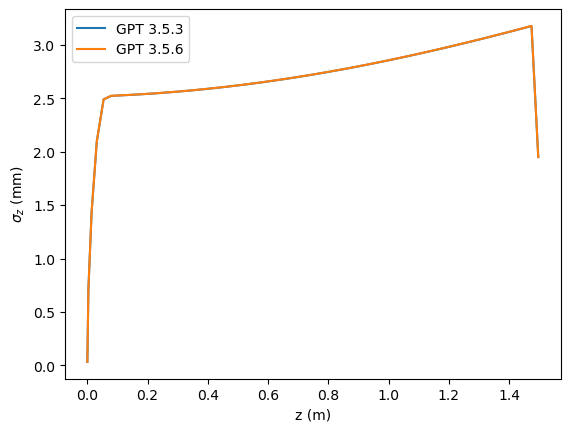

In [12]:
plt.plot(G1.tout_stat('mean_z'), G1.tout_stat('sigma_z')*1e3, label='GPT 3.5.3')
plt.plot(G2.tout_stat('mean_z'), G2.tout_stat('sigma_z')*1e3, label='GPT 3.5.6')
plt.xlabel('z (m)')
plt.ylabel(r'$\sigma_z$ (mm)')
plt.legend()

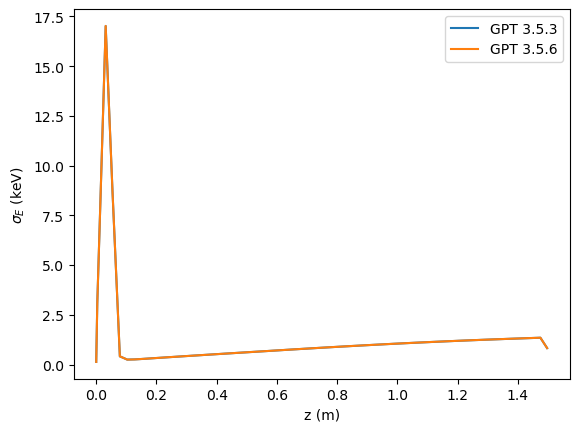

In [13]:
plt.plot(G1.tout_stat('mean_z'), G1.tout_stat('sigma_energy')/1e3, label='GPT 3.5.3')
plt.plot(G2.tout_stat('mean_z'), G2.tout_stat('sigma_energy')/1e3, label='GPT 3.5.6')
plt.xlabel('z (m)')
plt.ylabel(r'$\sigma_E$ (keV)')
plt.legend()